In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from neural_exploration import *
sns.set()

### Bandit settings

In [2]:
T = int(2e4)
n_arms = 4
n_features = 20
noise_std = 0.1

confidence_scaling_factor = noise_std

n_sim = 5

### LinUCB on linear rewards

In [ ]:
### mean reward function
a = np.random.randn(n_features)
a /= np.linalg.norm(a, ord=2)
h = lambda x: 10*np.dot(a, x)

In [3]:
bandit = ContextualBandit(T, n_arms, n_features, h, noise_std=noise_std)

regrets = np.empty((n_sim, T))

for i in range(n_sim):
    bandit.reset_rewards()
    model = LinUCB(bandit,
                   reg_factor=1.0,
                   delta=0.1,
                   confidence_scaling_factor=confidence_scaling_factor,
                  )
    model.run()
    regrets[i] = np.cumsum(model.regrets)

100%|██████████| 20000/20000 [00:06<00:00, 3226.73it/s, cum_regret=217]


### Logarithmic regret growth : the bandit problem is solved efficiently

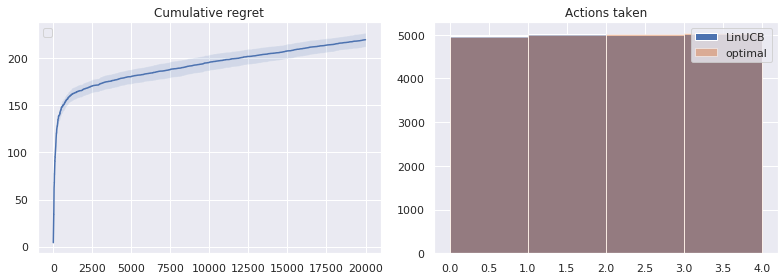

In [4]:
fig, axes = plt.subplots(figsize=(11, 4), nrows=1, ncols=2)

t = np.arange(T)

ax = axes[0]
mean_regrets = np.mean(regrets, axis=0)
std_regrets = np.std(regrets, axis=0) / np.sqrt(regrets.shape[0])
ax.plot(mean_regrets)
ax.fill_between(t, mean_regrets - 2*std_regrets, mean_regrets + 2*std_regrets, alpha=0.15)
    
ax.set_title('Cumulative regret')
ax.legend(loc='upper left')

ax = axes[1]
ax.hist(model.actions, bins=range(bandit.n_arms+1), label='LinUCB')
ax.hist(model.bandit.best_actions_oracle, bins=range(bandit.n_arms+1), label='optimal', alpha=0.5)
ax.set_title('Actions taken')
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

### LinUCB on nonlinear rewards

In [8]:
### mean reward function
a = np.random.randn(n_features)
a /= np.linalg.norm(a, ord=2)
h = lambda x: 10*np.dot(a, x)**2

In [9]:
bandit = ContextualBandit(T, n_arms, n_features, h, noise_std=noise_std)

regrets = np.empty((n_sim, T))

for i in range(n_sim):
    bandit.reset_rewards()
    model = LinUCB(bandit,
                   reg_factor=1.0,
                   delta=0.1,
                   confidence_scaling_factor=confidence_scaling_factor,
                  )
    model.run()
    regrets[i] = np.cumsum(model.regrets)

100%|██████████| 20000/20000 [00:06<00:00, 3163.66it/s, cum_regret=9.1e+3] 


### Linear regret growth: the bandit problem fails

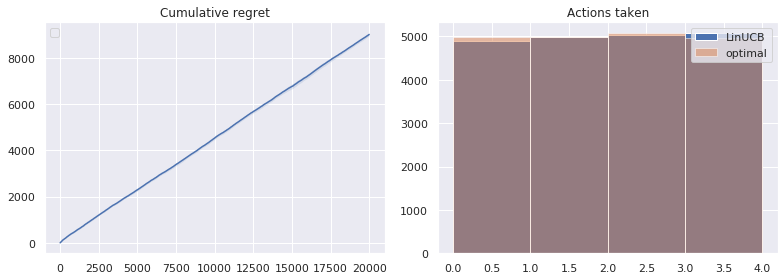

In [10]:
fig, axes = plt.subplots(figsize=(11, 4), nrows=1, ncols=2)

t = np.arange(T)

ax = axes[0]
mean_regrets = np.mean(regrets, axis=0)
std_regrets = np.std(regrets, axis=0) / np.sqrt(regrets.shape[0])
ax.plot(mean_regrets)
ax.fill_between(t, mean_regrets - 2*std_regrets, mean_regrets + 2*std_regrets, alpha=0.15)
    
ax.set_title('Cumulative regret')
ax.legend(loc='upper left')

ax = axes[1]
ax.hist(model.actions, bins=range(bandit.n_arms+1), label='LinUCB')
ax.hist(model.bandit.best_actions_oracle, bins=range(bandit.n_arms+1), label='optimal', alpha=0.5)
ax.set_title('Actions taken')
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()